<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data_multi_delta_(_3_6)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-3.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.6_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,26.874968,88.294053,30.296520,-0.000088,155.465453,155.466309,-0.000857
1,0.0,1.0,42.951344,73.852220,52.119510,0.000276,178.923351,178.923147,0.000204
2,0.0,2.0,42.434753,88.885449,76.915869,-0.000139,218.235932,218.235709,0.000224
3,0.0,3.0,61.204704,76.777843,66.063405,-0.000363,214.045589,214.045905,-0.000316
4,0.0,4.0,36.583443,84.657463,23.469720,0.000113,154.710740,154.711642,-0.000902
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,74.332208,64.381893,44.104300,-0.000071,192.818330,192.817899,0.000431
29996,999.0,26.0,71.715643,31.855089,55.078680,-0.000026,168.649386,168.648294,0.001093
29997,999.0,27.0,33.145018,77.694688,95.759336,0.000419,216.599462,216.599612,-0.000150
29998,999.0,28.0,38.619457,20.560943,36.583140,-0.005521,105.758019,105.762245,-0.004226


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    26.874968  88.294053  30.296520  ...  155.465453  155.466309 -0.000857
      1.0    42.951344  73.852220  52.119510  ...  178.923351  178.923147  0.000204
      2.0    42.434753  88.885449  76.915869  ...  218.235932  218.235709  0.000224
      3.0    61.204704  76.777843  66.063405  ...  214.045589  214.045905 -0.000316
      4.0    36.583443  84.657463  23.469720  ...  154.710740  154.711642 -0.000902
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   74.332208  64.381893  44.104300  ...  192.818330  192.817899  0.000431
      26.0   71.715643  31.855089  55.078680  ...  168.649386  168.648294  0.001093
      27.0   33.145018  77.694688  95.759336  ...  216.599462  216.599612 -0.000150
      28.0   38.619457  20.560943  36.583140  ...  105.758019  105.762245 -0.004226
      29.0   70.058620  23.450153  65.106955  ...  168.613119  168.614521 -0.001402

[30000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    26.874968  88.294053  30.296520  ...  155.465453  155.466309 -0.000857
      1.0    42.951344  73.852220  52.119510  ...  178.923351  178.923147  0.000204
      2.0    42.434753  88.885449  76.915869  ...  218.235932  218.235709  0.000224
      3.0    61.204704  76.777843  66.063405  ...  214.045589  214.045905 -0.000316
      4.0    36.583443  84.657463  23.469720  ...  154.710740  154.711642 -0.000902
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   74.332208  64.381893  44.104300  ...  192.818330  192.817899  0.000431
      26.0   71.715643  31.855089  55.078680  ...  168.649386  168.648294  0.001093
      27.0   33.145018  77.694688  95.759336  ...  216.599462  216.599612 -0.000150
      28.0   38.619457  20.560943  36.583140  ...  105.758019  105.762245 -0.004226
      29.0   70.058620  23.450153  65.106955  ...  168.613119  168.614521 -0.001402

[30000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,26.874968,88.294053,30.296520,-0.000088,155.465453,155.466309,-0.000857
1,0.0,1.0,42.951344,73.852220,52.119510,0.000276,178.923351,178.923147,0.000204
2,0.0,2.0,42.434753,88.885449,76.915869,-0.000139,218.235932,218.235709,0.000224
3,0.0,3.0,61.204704,76.777843,66.063405,-0.000363,214.045589,214.045905,-0.000316
4,0.0,4.0,36.583443,84.657463,23.469720,0.000113,154.710740,154.711642,-0.000902
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,74.332208,64.381893,44.104300,-0.000071,192.818330,192.817899,0.000431
29996,999.0,26.0,71.715643,31.855089,55.078680,-0.000026,168.649386,168.648294,0.001093
29997,999.0,27.0,33.145018,77.694688,95.759336,0.000419,216.599462,216.599612,-0.000150
29998,999.0,28.0,38.619457,20.560943,36.583140,-0.005521,105.758019,105.762245,-0.004226


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    26.874968  88.294053  30.296520  ...  155.465453  155.466309 -0.000857
      1.0    42.951344  73.852220  52.119510  ...  178.923351  178.923147  0.000204
      2.0    42.434753  88.885449  76.915869  ...  218.235932  218.235709  0.000224
      3.0    61.204704  76.777843  66.063405  ...  214.045589  214.045905 -0.000316
      4.0    36.583443  84.657463  23.469720  ...  154.710740  154.711642 -0.000902
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   74.332208  64.381893  44.104300  ...  192.818330  192.817899  0.000431
      26.0   71.715643  31.855089  55.078680  ...  168.649386  168.648294  0.001093
      27.0   33.145018  77.694688  95.759336  ...  216.599462  216.599612 -0.000150
      28.0   38.619457  20.560943  36.583140  ...  105.758019  105.762245 -0.004226
      29.0   70.058620  23.450153  65.106955  ...  168.613119  168.614521 -0.001402

[30000 rows x 7 columns]

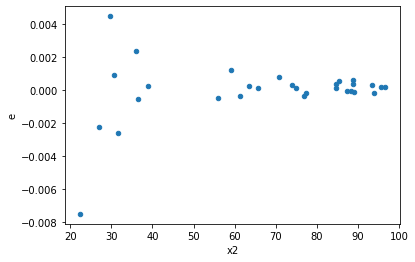

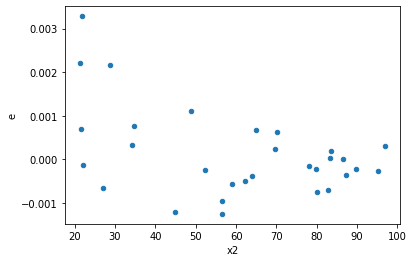

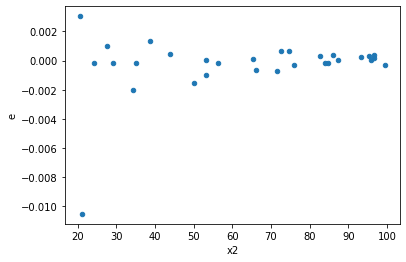

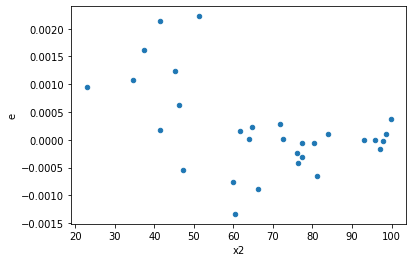

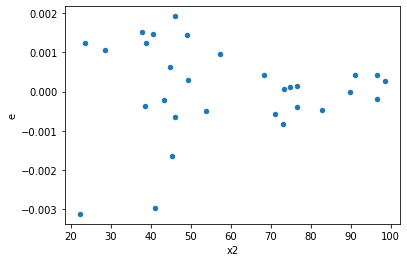

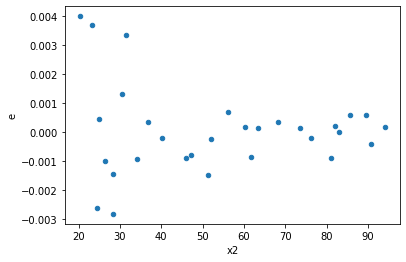

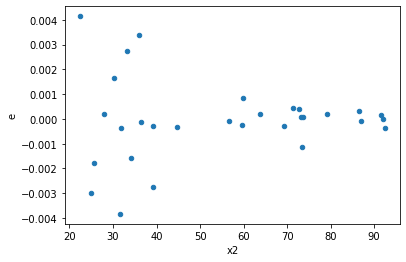

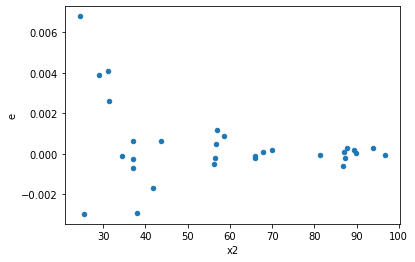

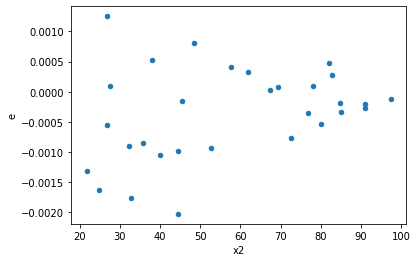

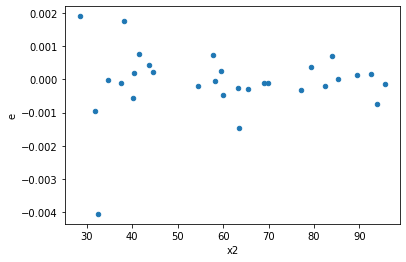

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,11.0,13.0,9.707185169700523e-06,6.684762790300743e-05,8.824713790636839e-07,5.142125223308263e-06,5.8269597692382264,0.0037949314461147576,0.9981025342769426,0.0018974657230573788,Reject001=0 : Heteroscedasticity
1.0,14.0,10.0,6.224181936666828e-06,1.1641260666245825e-05,4.4458442404763055e-07,1.1641260666245825e-06,2.618458955502822,0.13110008433986287,0.9344499578300686,0.06555004216993143,Reject001=1 : Homoscedasticity
2.0,14.0,10.0,2.436098315745318e-06,8.83065395939414e-05,1.74007022553237e-07,8.830653959394141e-06,50.748836626363314,4.438762954972475e-07,0.9999997780618523,2.2193814774862375e-07,Reject001=0 : Heteroscedasticity
6.0,6.0,18.0,3.4430294072029143e-06,7.089831369536776e-05,5.73838234533819e-07,3.938795205298209e-06,6.863946959717751,0.0012937589389634407,0.9993531205305183,0.0006468794694817204,Reject001=0 : Heteroscedasticity
7.0,14.0,10.0,2.106276206701146e-05,5.232410303433972e-05,1.504483004786533e-06,5.232410303433972e-06,3.477879302582341,0.05359276744955643,0.9732036162752218,0.026796383724778217,Reject001=1 : Homoscedasticity
8.0,14.0,10.0,1.8843997177385243e-06,1.0708422928063677e-05,1.34599979838466e-07,1.0708422928063678e-06,7.955738879689953,0.0022941678719174963,0.9988529160640413,0.0011470839359587481,Reject001=0 : Heteroscedasticity
10.0,12.0,12.0,2.5053634008908073e-05,3.162922280140564e-05,2.0878028340756727e-06,2.635768566783803e-06,1.2624604793923129,0.6928972288959971,0.6535513855520014,0.34644861444799857,Reject001=1 : Homoscedasticity
11.0,10.0,14.0,2.9968865226886828e-06,1.3987390646649276e-05,2.9968865226886825e-07,9.990993319035198e-07,3.333791000558704,0.03990152379172107,0.9800492381041395,0.019950761895860536,Reject001=1 : Homoscedasticity
13.0,13.0,11.0,4.440423938433522e-06,2.009882998464757e-05,3.41571072187194e-07,1.827166362240688e-06,5.349300661032943,0.008654970140931972,0.995672514929534,0.004327485070465986,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,11.0,13.0,9.707185169700523e-06,6.684762790300743e-05,8.824713790636839e-07,5.142125223308263e-06,5.8269597692382264,0.0037949314461147576,Reject001=0 : Heteroscedasticity
1.0,14.0,10.0,6.224181936666828e-06,1.1641260666245825e-05,4.4458442404763055e-07,1.1641260666245825e-06,2.618458955502822,0.13110008433986287,Reject001=1 : Homoscedasticity
2.0,14.0,10.0,2.436098315745318e-06,8.83065395939414e-05,1.74007022553237e-07,8.830653959394141e-06,50.748836626363314,4.438762954972475e-07,Reject001=0 : Heteroscedasticity
3.0,11.0,13.0,1.0065449439384646e-05,9.017452727033057e-07,9.150408581258769e-07,6.936502097717737e-08,0.0758053811053268,0.00014122281591432296,Reject001=0 : Heteroscedasticity
4.0,14.0,10.0,2.2443036134933897e-05,3.418942954395896e-06,1.6030740096381356e-06,3.4189429543958963e-07,0.2132741803460253,0.009187285868527212,Reject001=0 : Heteroscedasticity
5.0,12.0,12.0,3.8743094029622127e-05,8.810555609936404e-06,3.228591169135177e-06,7.342129674947004e-07,0.22740970566780355,0.015863330164930297,Reject001=1 : Homoscedasticity
6.0,6.0,18.0,3.4430294072029143e-06,7.089831369536776e-05,5.73838234533819e-07,3.938795205298209e-06,6.863946959717751,0.0012937589389634407,Reject001=0 : Heteroscedasticity
7.0,14.0,10.0,2.106276206701146e-05,5.232410303433972e-05,1.504483004786533e-06,5.232410303433972e-06,3.477879302582341,0.05359276744955643,Reject001=1 : Homoscedasticity
8.0,14.0,10.0,1.8843997177385243e-06,1.0708422928063677e-05,1.34599979838466e-07,1.0708422928063678e-06,7.955738879689953,0.0022941678719174963,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    525
Reject001=1 : Homoscedasticity      475
Name: Result_test, dtype: int64